<a href="https://colab.research.google.com/github/AleC1998/Python_Final_Project/blob/main/Informe_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final de Análisis de Datos y Machine Learning en Python
Alejandro Castro Cabrera, Facultad de Física, Universidad de La Habana, 2022

# Introducción

El uso de los datos de redes de telefonía celular para estudios de movilidad humana ha aumentado considerablemente en las últimas décadas. Las redes de telefonía móvil fueron consideradas fuentes de datos más confiables en comparación con las encuestas de movilidad y otros tipos de sensores. En este sentido, el rápido crecimiento de las redes, el asentamiento y penetración del uso diario de los celulares en el mundo, hicieron de los datos de telefonía un candidato inevitable para el desarrollo de un largo arsenal de herramientas de apoyo para la toma de decisiones y el estudio de la movilidad humana. 

Los registros celulares permiten evaluar características poblacionales relevantes, en particular las que refieren a la movilidad en escalas intermedias, limitadas por la cantidad de torres distribuidas en el territorio de interés. Las aplicaciones más directas son obviamente las relativas al transporte: obtención de matrices de origen-destino, la identificación de medios de transportes usados por los viajeros, el análisis de patrones horarios, semanales o estacionales de movilidad. Pero esta información tiene valor más allá del análisis del transporte público en campos como la urbanística, la sociología y la epidemiología. Este último campo es donde más se ha aplicado el estudio de los patrones de movilidad.

Particularmente en este proyecto utilizaremos matrices de movilidad diarias obtenidas a partir de estos datos celulares y procederemos a continuar su estudio y caracterización, mientras introducimos a la vez herramientas básicas para el análisis de datos y el uso de $Machine$ $Learning$ en $Python$.


# Datos de telefonía móvil

A diferencia de la telefonía satelital, la tecnología imperante para los teléfonos móviles no descansa exclusivamente en el uso de radio frecuencias punto-a-punto. Una red de torres de telefonía se encarga de la comunicación inalámbrica con los móviles, mientras que la red de torres está entrelazada en un soporte de fibra óptica.

En una misma torre de telefonía coexisten varias antenas, que gestionan las llamadas, SMS e internet para los
teléfonos. Las antenas normalmente son direccionales (cubren un sector angular típicamente de 120 grados con origen en la torre) y pueden diferenciarse también por el tipo de servicio que ofrecen: 2G, 3G, 4G, etc.

El área que cada antena cubre define el mapa de cobertura de la red y depende, entre otros, de las características del terreno y de la interferencia generada por las edificaciones.

La interacción entre los dispositivos móviles y las antenas generan registros. Estos contienen datos sobre el dispositivo en cuestión, la antena y una marca de tiempo. Al analizarlos es posible obtener información sobre
la movilidad poblacional como son: patrones de trayectorias, distancias recorridas, lugares de aglomeración, redes
sociales, etc.

La suposición fundamental es que a partir de una ubicación aproximada de los usuarios y sus cambios en el espacio-tiempo es posible determinar la ocurrencia de movimiento y las trayectorias recorridas

# Registros CDR

Los registros que se generan en la telefonía móvil dependen del proveedor de la tecnología de la red, aunque algunas especificaciones se han ido estableciendo de forma general. El más común de estos registros son los llamados $Call$ $Details$ $Records$ (CDR), que se generan al enviar o recibir llamadas, mensajes y al acceder a la red de datos; estos se clasifican como reportes desencadenados por eventos. El propósito fundamental de estos es la facturación a los usuarios por los servicios y por ende las compañías tienden a conservalos por un mayor intervalo de tiempo. Por esta razón, han sido usados en estudios de movilidad. De forma general los CDR contienen: una marca de tiempo, el tipo de operación realizada, el identificador de la antena que gestionó la conexión, los identificadores del dispositivo emisor y del receptor y la duración de la operación.

Existen otros registros que son generados por la red telefónica, entre los que se encuentran los $Location$ $Update$ $Records$ (LUR). Los LUR se generan al ocurrir alguna de las siguientes acciones: llamadas, mensajes de texto, cambio entre zonas de cobertura, encendido del teléfono, y cada cierto intervalo de tiempo de no ocurrir ninguna de las acciones anteriores y se clasifican como reportes desencadenados por la red. El propósito de estos registros es que la red pueda mantener un estado sobre la ubicación aproximada de un dispositivo y sea eficiente en el momento
de contactarlo para una llamada o mensaje de texto. Los LUR se componen por: un identificador del registro, el identificador del dispositivo, el identificador de la condición que generó el registro, el identificador de la antena a la cual el dispositivo está conectado y una marca de tiempo.

Dado que estos registros no se utilizan por las operadores telefónicos para el cobro de los servicios, son desechados luego de un corto período de tiempo. Por este motivo ha sido menos frecuente su uso en estudios. Sin embargo, los LUR poseen una ventaja comparados con los CDR: como son generados cada cierto tiempo aseguran poseer registros independientemente de las acciones del usuario. Esta característica los hacen un buen candidato para estudios de movilidad poblacional.

Tanto los CDR como los LUR contienen los identificadores del dispositivo y la antena donde se generó la acción. Obviamente, las compañías telefónicas conocen la ubicación geográfica de sus torres y por ende de las antenas que residen en ella. La ubicación de las antenas en conjunto con alguno de los registros anteriores, permiten estimar la ubicación de los usuarios.

Idealmente dado un mapa de cobertura en función de las antenas se puede estimar el área donde se encuentran los usuarios conectados a ellas.

La incertidumbre de esta estimación depende de muchos factores, entre ellos la densidad de torres en la superficie, pero suele estar en el orden de los unidades hasta las decenas de kilómetros. La asignación de torres a puntos del espacio no es ni siquiera estática y fluctúa durante el día. Los procedimientos utilizados por la red telefónica
para balancear el tráfico en las radio bases involucran múltiples factores: uno de ellos es la cantidad de usuarios que ya son atendidos por las antenas de esa torre. Debido a esto, si una radio base posee un elevado número de
usuarios previamente conectados, reduce su potencia y por ende su área de cobertura. De ahí que la conexión de un nuevo usuario será manejada por una antena lejana si la más cercana se encuentra saturada. Este procedimiento es denominado respiración celular. No obstante, la mayoría de los usuarios son atendidos por la torre más cercana. De no ser así se producirián problemas de cobertura y la red no funcionaría correctamente, implicando un reordenamiento por parte la compañía telefónica.

Debido a esto se asume que si una operación fue gestionada por una antena entonces esta es la más cercana al usuario. Según esta hipótesis se crean particiones en el espacio, usando el método de Voronoi. Este consiste en asignar a las radio bases el área más cercana a ellas, utilizando la distancia euclidiana. Formalmente este méto-
do define una función $V$ que va del conjunto de puntos del espacio $R^2$ al conjunto de torres de telefonía $T$:

$V : R^2 → T$, 

estas regiones permiten delimitar y, por ende estimar la ubicación del usuario al ser atendido por una antena. 

# Matrices OD

Las matrices de Origen-Destino (OD) son los indicadores estándar de los estudios de movilidad. Estas proveen un estimado de la cantidad de personas que viajan entre ubicaciones durante un período de tiempo. Formalmente una matriz OD es una matriz $M$ rectangular de $n$ filas y $m$ columnas que representan las ubicaciones de “origen” y “destino” respectivamente y $M [ p, q ]$ es el número de personas que “viajan” de la zona $p$ a la zona $q$. Es común que el área de estudio sea particionada en el mismo número de orígenes y destinos y por ende $n = m$. En este trabajo se utiliza el enfoque de igual cantidad de orígenes y destinos.

Una de las formas de obtener una matriz de este tipo es a través de los datos de telefonía celular. Las matrices que se utilizan en este caso son compuestas por la movilidad diaria entre las áreas de salud de La Habana, para un total de 82 áreas de salud, tenemos entonces que $n=m=82$, generando una serie temporal de 123 matrices de movilidad desde el 4 de marzo hasta el 4 de julio de 2020.

En el trabajo previo realizado por nuestro grupo para el estudio de la movilidad con datos de telefonía durante la pandemia, las torres de telefonía aparecen localizadas en la superficie del país, y a cada una se le asigna una superficie de "cobertura". Usando el procedimiento de distribuir la población de las zonas de salud en proporción a su intersección con las celdas de cobertura definidas para la telefonía, se pueden generar matrices de origen-destino a nivel de áreas de salud. De esta forma se generaron $t=123$ matrices $M_{AS}(t)$  según la expresión:

$M_{AS}(t) [ P p , P q ] = |V_p^q |$

donde $V_p^q $ es el conjunto de usuarios que se desplazaron entre las áreas de salud $p$ y $q$ respectivamente.

# Análisis y trabajo con los datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import datetime
import seaborn as sns
import scipy.stats as stats
from scipy.spatial.distance import squareform
import scipy.stats
import itertools as it
import collections
import math
from sklearn_extra.cluster import KMedoids
from seaborn import heatmap
import seaborn as sn
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

Nuestros datos se encuentran en un archivo tipo $.json$ que podemos ver compuesto por filas de áreas de salud con sus respectivos valores de movilidad para cada día con respecto a otra área.

In [ ]:
raw_data=pd.read_json(r"corrected_mobility_notdiagonal.json")
print(raw_data)

                                                            13 DEMARZO  \
13 DEMARZO           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
14 DE JUNIO          [43.13707560203665, 45.453705553159566, 46.780...   
15 Y 18 Vedado       [123.28759403815276, 126.25644032813707, 158.5...   
19 DE ABRIL          [38.89380047547987, 43.09141345306345, 45.1068...   
1RO DE ENERO         [32.88670919745954, 33.97053725975883, 42.7990...   
...                                                                ...   
WAJAY                [40.55204871892705, 45.36950879417554, 42.4384...   
WILFREDO SANTANA     [267.29792012204035, 278.79145038503486, 288.6...   
BOYEROS              [14.75412811274402, 10.236970009906837, 15.169...   
BETANCOURT NENINGER  [1373.1275674407948, 1446.9634107317283, 1359....   
CAMPO FLORIDO        [9.934689531255945, 10.432643505443949, 9.1019...   

                                                           14 DE JUNIO  \
13 DEMARZO           [43.137075602036

In [ ]:
shape=raw_data.shape
print(shape)

(82, 82)


O sea, para fijar ideas, tenemos un arreglo tridimensional, y como vemos en el ejemplo, así se obtendría el valor de movilidad entre las áreas de salud 14 de Junio y Wajay para el día 1.

In [ ]:
print(raw_data["14 DE JUNIO"]["WAJAY"][0])

115.93808336356886


PASTEUR y Los Pinos


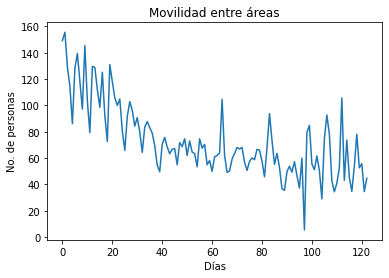

In [ ]:
areas=raw_data.keys()
a1=random.choice(areas)
a2=random.choice(areas)
plt.plot(raw_data[a1][a2])

print(a1, "y", a2)
plt.title("Movilidad entre áreas")
plt.xlabel("Días")
plt.ylabel("No. de personas")

plt.show()

Ahora definiremos algunas funciones que usaremos y explicaremos posteriormente:

In [ ]:
def single_matrix(t):
        sm=[raw_data[i][j][t] for j in areas for i in areas]
        sm=np.array(sm)
        sm=sm.reshape((len(areas),len(areas)))
        return sm
    
def single_vector(t):
        sv=[raw_data[i][j][t] for j in areas for i in areas]
        sv=np.array(sv)
        return sv

def roc_data(d, v ):
    c_bottom_g=0
    c_bottom_i=0
    c_top_g=0
    c_top_i=0
    for i in gen_imp:
        if i>v:
            if d[i]=="g":
                c_bottom_g+=1
            else:
                c_bottom_i+=1
        else:
            if d[i]=="g":
                c_top_g+=1
            else:
                c_top_i+=1
    return c_bottom_g,c_bottom_i,c_top_g,c_top_i            


Como pretendemos indagar acerca de la relación que podría tener la movilidad y la naturaleza de los distintos días de la semana, entiéndase por ejemplo, distinguirlos unos de otros, es importante tener a mano un identificador sencillo. De esta manera podemos empezar la metodología de distinción, por ejemplo, podemos tomar todos los índices de los miércoles y domingos.

In [ ]:
ini_date=datetime.datetime(2020,3,4)
delta=123
r=[ini_date + datetime.timedelta(days=idx) for idx in range(delta)]
days={}

wed=[i for i in range(123) if r[i].weekday()==2]
sun=[i for i in range(123) if r[i].weekday()==6]
print(len(wed))
print(len(sun))
len(r)

18
17


123

# Definición de la función distancia

Lo primero que necesitamos calcular para hacer un ejercicio de clustering o agrupamiento es la distancia. Antes de agrupar los elementos por su similitud, tenemos que definir la similitud misma. La distancia juega un papel funadmental en el $machine$ $learning$. Esta provee las bases para muchos algoritmos útiles y populares de $machine$ $learning$ como los $k$-$nearest$ $neighbors$ para $supervised$ $learning$ y $k$-$means$ $clustering$ para $unsupervised$ $learning$. 

Diferentes medidas de distancia deben ser escogidas y usadas dependiendo de los tipos de datos. Una medida de distancia es un marcador objetivo que sintetiza la diferencia relativa entre dos objetos en el dominio del problema.

En principio, nosotros propondremos como función de distancia la correlación de Spearman entre las matrices e indagaremos sobre si resulta una buena distancia para el problema.

# Coeficiente de correlación de Spearman

En estadística, el coeficiente de correlación de rango de Speraman o el ρ de Spearman, es una medida no paramétrica de correlación de rango (dependencia estadística entre los rangos de dos variables). Refiere a cuán bien puede ser descrita la relación entre dos variables por una función monótona. 

La correlación de Spearman entre dos variables es igual a la correlación de Pearson entre el rango de valores de esas dos variables; mientras que la correlación de Pearson identifica relaciones lineales, la correlación de Spearman refiere relaciones monótonas, sean lineales o no. Sin valores repetidos, una correlación de Spearman perfecta de +1 o -1 ocurre cuando cada una de las variables es una un función perfectamente monótona de la otra.

Intuitivamente, la correlación de Spearman entre dos variables será alta cuando las observaciones tienen rangos (la posición relativa de la s observaciones de la variable) similares o idénticos entre dos variables, y baja cuando no sean similares o directamente opuestos. 

El coeficiente de correlación de Spearman se define como el coeficiente de correlación de Pearson entre el rango de las variables.

Para una muestra de tamaño $n$, los $n$ marcadores puros $X_i$, $Y_i$ se convierten en rangos $R(X_i)$, $R(Y_i)$ y entonces $r_s$ queda como:


\begin{equation}
r_s=\rho_{R(X)R(Y)}=\frac{cov(R(X),R(Y))}{\sigma_{R(X)}\sigma_{R(Y)}}
\end{equation}


donde $\rho$ denota el coeficiente de correlación de Pearson usual, pero aplicado a variables de rango,

$\operatorname {cov} (\operatorname {R} (X),\operatorname {R} (Y))$ es la covarianza de las variables de rango,

$\sigma _{\operatorname {R} (X)}$ y $\sigma _{\operatorname {R} (Y)}$ son las desviaciones estándar de las variables de rango.


Solo si todos los rangos $n$ son enteros distintos, se puede expresar usando la fórmula:

\begin{equation}
r_{s}=1-{\frac {6\sum d_{i}^{2}}{n(n^{2}-1)}}
\end{equation}

donde,

$d_{i}=\operatorname {R} (X_{i})-\operatorname {R} (Y_{i})$ es la diferencia entre dos rangos de cada observación,

$n$ es el número de observaciones.

# Función distancia

La idea es comprobar preliminarmente si la correlación de Spearman puede ser o no una buena medida de distancia. Aquí usamos la función $single_vector$ que fue definida anteriormente, la cual recibe un día cualquiera y retorna la matriz de movilidad de ese día en forma de vector. Aquí tomamos una parte de la muestra para probar cómo se desenvuelve la función distancia y como vemos al menos es capaz de correlacionar correctamente los días de la misma categoría.

In [ ]:
wed_gen=[scipy.stats.spearmanr(single_vector(wed[i]),single_vector(wed[i+1]))[0] for i in range(5,10)]
sun_gen=[scipy.stats.spearmanr(single_vector(sun[i]),single_vector(sun[i+1]))[0] for i in range(5,10)]


print(wed_gen)
print(sun_gen)

[0.975486838613996, 0.9860474723011846, 0.9856524326405578, 0.9888294119073832, 0.9872193407065594]
[0.9658955578125302, 0.9795407893551137, 0.974720592078187, 0.990649156168601, 0.9935302396822595]


El siguiente paso es usar la función distancia para determinar su efectividad de detección de valores genuinos e impostores, en donde los genuinos serían los días de la misma categoría y los impostores los cruzados.

In [ ]:
ij_imp=list(it.combinations_with_replacement(range(len(sun)),2))

impostors=[scipy.stats.spearmanr(single_vector(wed[i[0]]),single_vector(sun[i[1]]))[0] for i in ij_imp]

ij_gen_w=list(it.combinations(range(len(wed)),2))
ij_gen_s=list(it.combinations(range(len(sun)),2))

genuines=[scipy.stats.spearmanr(single_vector(wed[i[0]]),single_vector(wed[i[1]]))[0] for i in ij_gen_w]+[scipy.stats.spearmanr(single_vector(sun[i[0]]),single_vector(sun[i[1]]))[0] for i in ij_gen_s]


Ahora podemos clasificarlos según su valor real para luego poder comparar.

In [ ]:
gen_imp=impostors+genuines

d={}
for i in range(len(gen_imp)):
    if i<len(impostors):
        d[gen_imp[i]] = "i"
    else:
        d[gen_imp[i]] = "g"

Si ahora ordenamos los valores, vamos teniendo un diccionario que tiene la siguiente forma:

In [ ]:
sd=collections.OrderedDict(sorted(d.items()))
sd

OrderedDict([(0.7245391431652322, 'i'),
             (0.7401517012609079, 'i'),
             (0.7459822940414377, 'i'),
             (0.7541899876696795, 'i'),
             (0.766124543934176, 'i'),
             (0.7664905028612692, 'i'),
             (0.7697810493139969, 'i'),
             (0.7706796399525047, 'i'),
             (0.7722522190075882, 'g'),
             (0.7723386802109731, 'i'),
             (0.7730117649893633, 'i'),
             (0.7734537452012292, 'i'),
             (0.773566875511747, 'i'),
             (0.7742338499216244, 'i'),
             (0.7752701739888043, 'g'),
             (0.7768229319844214, 'g'),
             (0.7776535835432922, 'g'),
             (0.7776943966230896, 'i'),
             (0.780621270258177, 'g'),
             (0.7816552829095866, 'g'),
             (0.7816745465529235, 'i'),
             (0.7826787937555836, 'g'),
             (0.7826830456914087, 'g'),
             (0.7838748751813482, 'g'),
             (0.7840458301109116, 'g'),
   

# Curva ROC

La curva ROC ($Receiver$ $Operating$ $Characteristic$) es utilizada para visualizar el rendimiento de un clasificador binario. Nos devuelve la relación entre la tasa de positivos verdaderos ($True$ $Positive$ $Rate$, TPR) y la tasa de falsos positivos ($False$ $Positive$ $Rate$, FPR) para diferentes valores umbrales.

\begin{equation}
TPR = \frac{PV}{PV+FN}
\end{equation}

\begin{equation}
FPR = \frac{FP}{NV+FP}
\end{equation}

donde
PV son los positivos verdaderos,
FN son los falsos negativos,
FP son los falsos positivos,
NV son los negativos verdaderos.

Para distintos valores umbrales se obtienen distintos TPR y FPR, de manera que para visualizar qué umbral es mejor para el clasificador se hace la curva ROC, la diagonal con el eje de coordenadas representaría la curva ROC para valores reales por lo que se espera siempre para una buena clasificación, que esté por encima de esta.


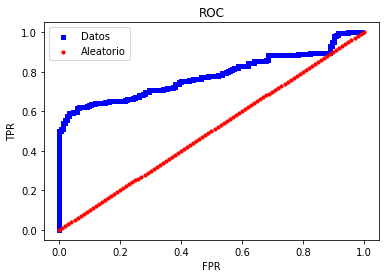

In [ ]:
inv_gen_imp=gen_imp
inv_gen_imp.sort()
inv_gen_imp.reverse()

roc_data_curve=[(roc_data(d, i)[0]/(roc_data(d, i)[0] + roc_data(d, i)[2]),roc_data(d, i)[1]/(roc_data(d, i)[3] + roc_data(d, i)[1])) for i in inv_gen_imp]

tpry,fprx = zip(*roc_data_curve)
x=[i/100 for i in range(101)]
y=[i/100 for i in range(101)]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(fprx,tpry, s=10, c='b', marker="s", label='Datos')
ax1.scatter(x,y, s=10, c='r', marker="o", label='Aleatorio')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("ROC")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# G-Mean


La clasificación es una de las técnicas de aprendizaje supervisado para realizar análisis predictivos con el resultado categórico, puede ser una clase binaria o multiclase. Hoy en día, hay mucha investigación y casos sobre clasificación utilizando varios algoritmos, desde básicos hasta avanzados como regresión logística, análisis discriminante, $Naive$ $Bayes$, árbol de decisión, bosque aleatorio, máquina de vectores de soporte, red neuronal, etc. Han sido bien desarrollados y aplicados con éxito a muchos dominios. Sin embargo, la distribución de clases desequilibrada de un conjunto de datos tiene un problema porque la mayoría de las técnicas de aprendizaje supervisado desarrolladas son para la distribución de clases equilibrada.


La media geométrica o G-mean es la media geométrica de sensitvidad y espeficificidad. Es una de las evaluaciones métricas no sesgadas para la clasificación.

Usando G-mean como métrica de evaluación imparcial y el enfoque principal del movimiento del umbral, produce el umbral óptimo para la clasificación binaria. Teóricamente, la observación se categorizará como clase menor cuando su probabilidad sea inferior a este umbral y viceversa.

In [ ]:
gmean = np.sqrt([list(tpry)[i] * (1 - list(fprx)[i]) for i in range(len(fprx))])

In [ ]:
index = np.argmax(gmean)
thresholdOpt = round(inv_gen_imp[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fprx[index], ndigits = 4)
tprOpt = round(tpry[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt),"at index: ", index)
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

Best Threshold: 0.9434 with G-Mean: 0.7614 at index:  187
FPR: 0.0588, TPR: 0.6159


In [ ]:
youdenJ = [list(tpry)[i] - list(fprx)[i] for i in range(len(fprx))]

index = np.argmax(youdenJ)
thresholdOpt = round(inv_gen_imp[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fprx[index], ndigits = 4)
tprOpt = round(tpry[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt),"at index: ", index)
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))


Best Threshold: 0.9463 with Youden J statistic: 0.7565 at index:  176
FPR: 0.0327, TPR: 0.5917


# Matriz de distancia

El agrupamiento comienza calculando una distancia entre cada par de unidades que desea agrupar. Una matriz de distancia será simétrica (porque la distancia entre x e y es la misma que la distancia entre y y x) y tendrá ceros en la diagonal (porque cada elemento está a una distancia cero de sí mismo).

Como habíamos visto usaremos la correlación de Spearman para definir nuestras distancias, pero la correlación funciona de manera inversa a lo que queremos, por lo que en realidad usaremos como distancia $d(i,j)=1-corr(i,j)$. Para ello usaremos los datos no empleados para definir nuestra distancia.

In [ ]:
used_data=[wed[i] for i in range(5,11)]+[sun[i] for i in range(5,11)]
learning_data=[]
for i in range(123):
    if i not in used_data:
        learning_data.append(i)

len(learning_data)


111

In [ ]:
ij_elements=list(it.product(range(len(learning_data)), range(len(learning_data))))

In [ ]:
corr_vector_f=[scipy.stats.spearmanr(single_vector(learning_data[i[0]]),single_vector(learning_data[i[1]]))[0] for i in ij_elements]

In [ ]:
math.sqrt(len(corr_vector_f))

111.0

In [ ]:
cr=np.array(corr_vector_f)
corr_matrix_f=cr.reshape((int(math.sqrt(len(corr_vector_f))),int(math.sqrt(len(corr_vector_f)))))
#corr_matrix=np.delete(corr_matrix,85,0)
#corr_matrix=np.delete(corr_matrix,85,1)
#corr_matrix=np.delete(corr_matrix,84,0)
#corr_matrix=np.delete(corr_matrix,84,1)
np.shape(corr_matrix_f)

(111, 111)

Finalmente observamos la matriz de correlación, en donde salta claramente a la vista uno de los días.

<AxesSubplot: >

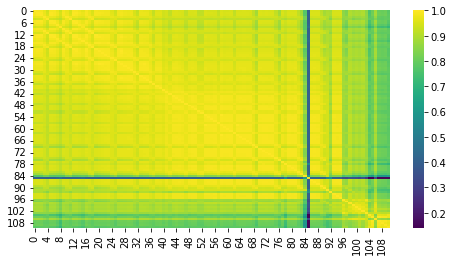

In [ ]:
heatmap(corr_matrix_f, cmap='viridis')

# K-Medoids

K-medoids es un algoritmo de agrupamiento ($clustering$) relacionado con los algoritmos $k-means$ y $medoidshift$.

Tanto el $k-medoids$ como el $k-means$ son algoritmos que trabajan con particiones (dividiendo el conjunto de datos en grupos) y ambos intentan minimizar la distancia entre puntos que se añadirían a un grupo y otro punto designado como el centro de ese grupo. En contraste con el algoritmo $k-means$, $k-medoids$ escoge datapoints como centros y trabaja con una métrica arbitraria de distancias entre datapoints en vez de usar la norma $l_2$. 

K-medoid es una técnica clásica de particionado de grupos que divide los datos conformados por n objetos en k grupos (con k conocido de antemano).

Es más robusto ante el ruido y a partes aisladas que k-means porque minimiza una suma de disimilaridades (entre pares de puntos) en vez de una suma de distancias euclidianas cuadradas.

Un medoid puede ser definido como el objeto de un grupo cuya disimilaridad media a todos los objetos en el grupo es mínima. Es el punto ubicado más hacia el centro en todo el grupo. 

# PAM

La aplicación práctica más común de k-medoids es el algoritmo Partición Alrededor de Medoids (PAM). PAM utiliza una búsqueda golosa que puede no encontrar la solución óptima, pero es más rápido que la búsqueda exhaustiva.Trabaja como sigue:

    1-Inicialización: seleccionar k de los n puntos como el medoid.
    2-Asociar cada punto al medoid más cercano.
    3-Mientras el costo de la configuración disminuya:
        *Para cada medoid m, para cada no medoid o:
            -Intercambiar m y o, recalcular el costo (suma de la distancia de los puntos a sus medoids).
            -Si el costo total de la configuración aumentó en el paso anterior, deshacer el intercambio.

In [ ]:
kmedoids = KMedoids(n_clusters=7,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix_f)

In [ ]:
lab=kmedoids.labels_
lab

array([5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5,
       5, 5, 3, 3, 5, 5, 5, 5, 5, 3, 3, 5, 5, 5, 5, 3, 1, 1, 5, 5, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 6, 0, 0, 1, 0, 4, 0, 0, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2,
       2])

In [ ]:
mon=[i for i in learning_data if r[i].weekday()==0]
tue=[i for i in learning_data if r[i].weekday()==1]
wed=[i for i in learning_data if r[i].weekday()==2]
thu=[i for i in learning_data if r[i].weekday()==3]
fri=[i for i in learning_data if r[i].weekday()==4]
sat=[i for i in learning_data if r[i].weekday()==5]
sun=[i for i in learning_data if r[i].weekday()==6]

In [ ]:
m=[lab[learning_data.index(mon[i])] for i in range(len(mon))]
t=[lab[learning_data.index(tue[i])] for i in range(len(tue))]
w=[lab[learning_data.index(wed[i])] for i in range(len(wed))]
th=[lab[learning_data.index(thu[i])] for i in range(len(thu))]
f=[lab[learning_data.index(fri[i])] for i in range(len(fri))]
s=[lab[learning_data.index(sat[i])] for i in range(len(sat))]
su=[lab[learning_data.index(sun[i])] for i in range(len(sun))]

(array([0., 6., 0., 5., 0., 0., 0., 0., 0., 0.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

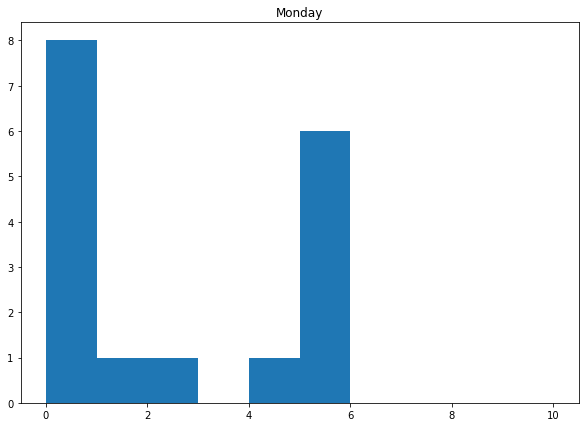

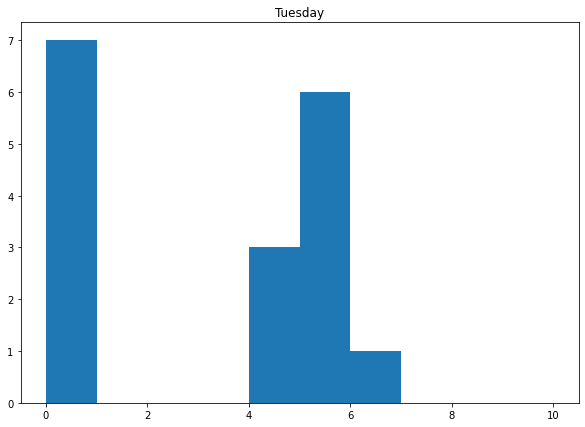

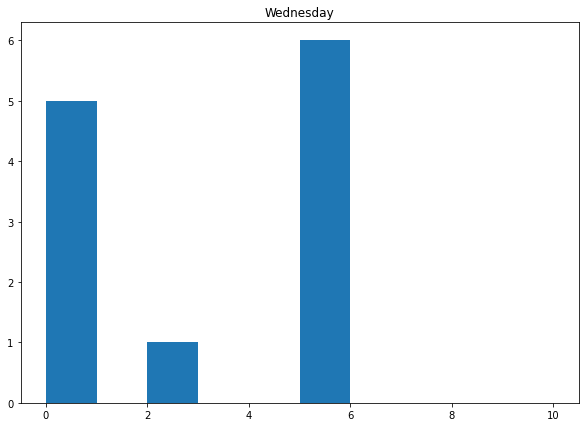

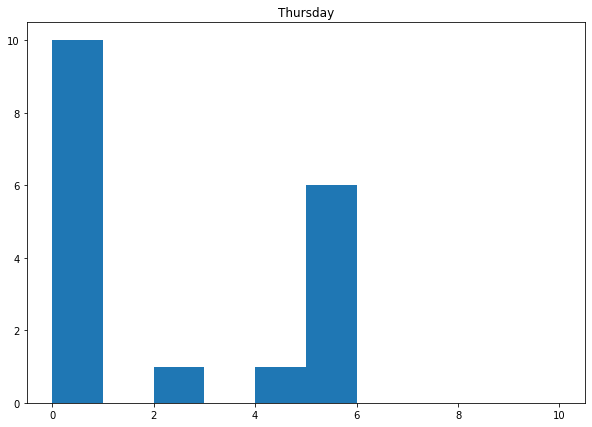

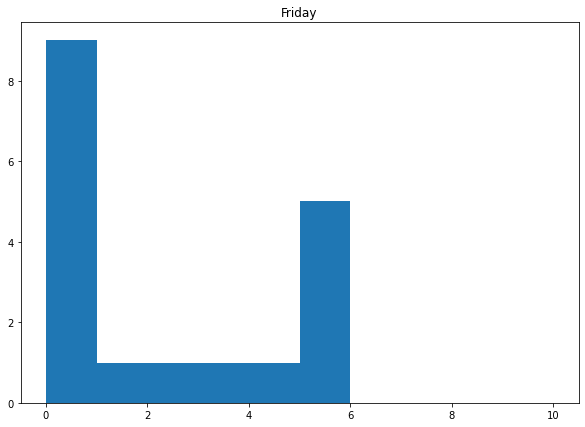

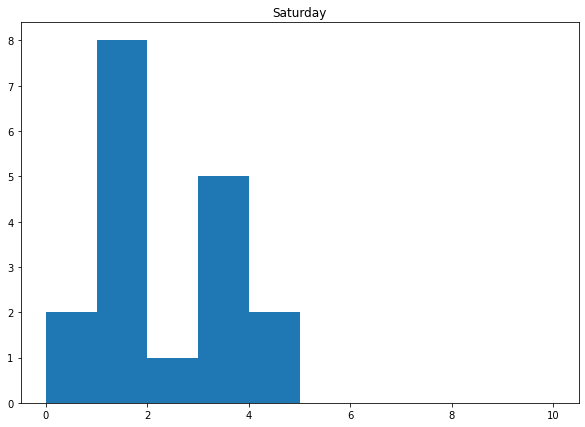

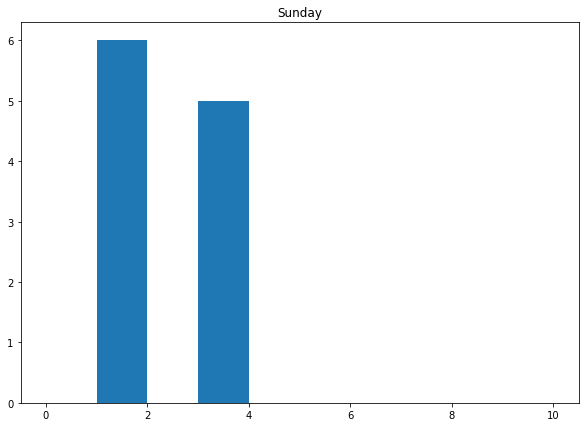

In [ ]:
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Monday')
ax.hist(m, bins = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Tuesday')
ax.hist(t, bins = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Wednesday')
ax.hist(w, bins = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Thursday')
ax.hist(th, bins = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Friday')
ax.hist(f, bins = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Saturday')
ax.hist(s, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
fig, ax = plt.subplots(figsize =(10, 7))
plt.title('Sunday')
ax.hist(su, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

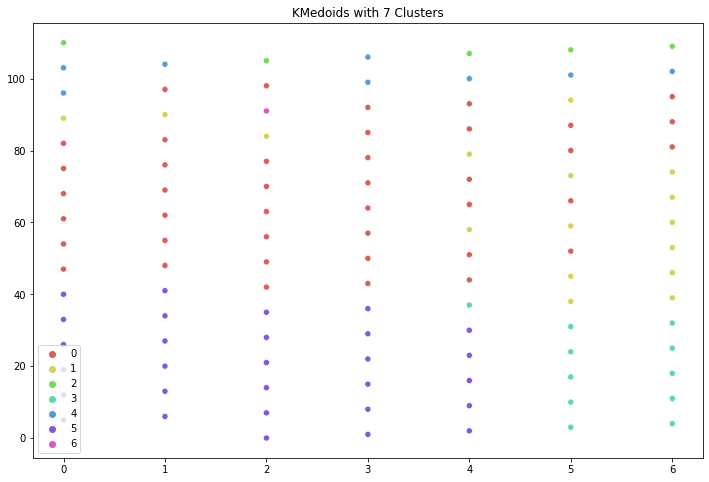

In [ ]:
plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 7))
plt.title('KMedoids with 7 Clusters')
plt.show()

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]

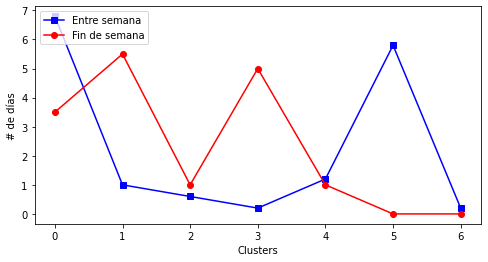

In [ ]:
y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]+[len(five)]+[len(six)]
x=[i for i in range(7)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]+[len(ffive)]+[len(fsix)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()

In [ ]:
kmedoids = KMedoids(n_clusters=5,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix_f)

In [ ]:
lab=kmedoids.labels_

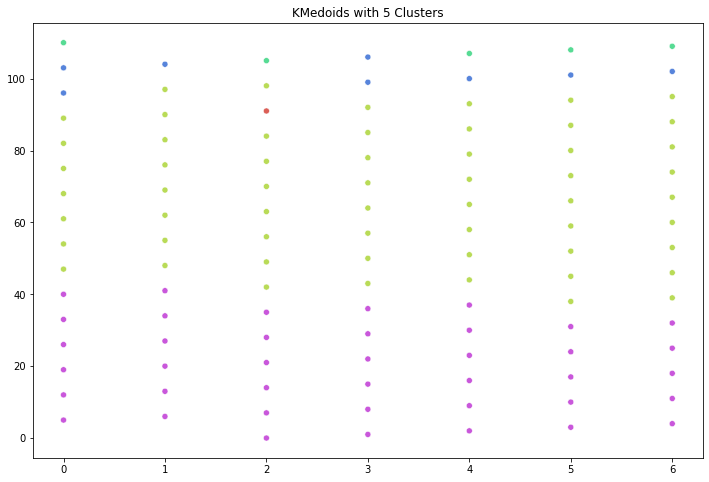

In [ ]:
plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 5),legend=False)
plt.title('KMedoids with 5 Clusters')
plt.show()

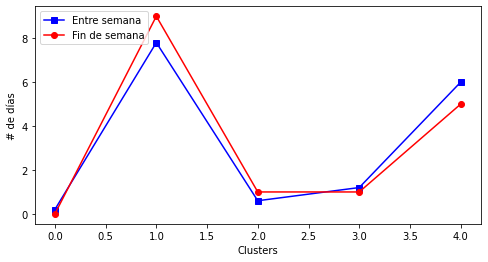

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]



y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]
x=[i for i in range(5)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()

In [ ]:
kmedoids = KMedoids(n_clusters=10,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix_f)

In [ ]:
lab=kmedoids.labels_

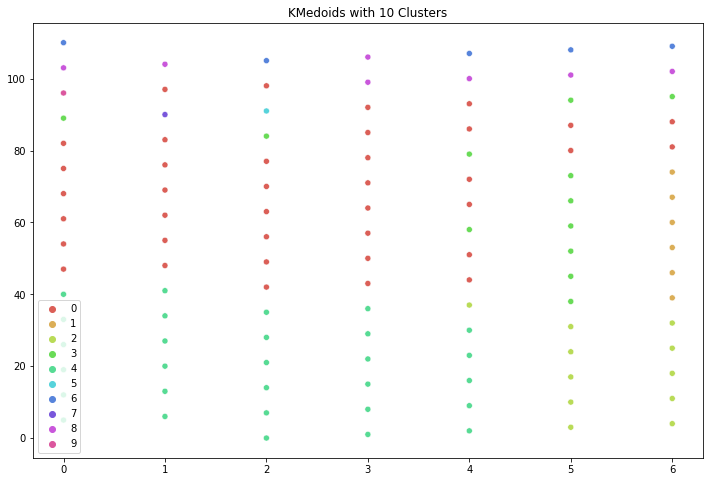

In [ ]:
plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 10))
plt.title('KMedoids with 10 Clusters')
plt.show()

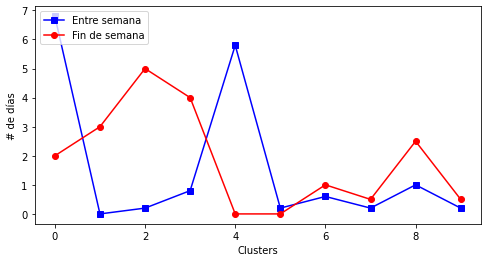

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]
seven=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==7]
eight=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==8]
nine=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==9]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]
fseven=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==7]
feight=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==8]
fnine=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==9]



y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]+[len(five)]+[len(six)]+[len(seven)]+[len(eight)]+[len(nine)]

x=[i for i in range(10)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]+[len(ffive)]+[len(fsix)]+[len(fseven)]+[len(feight)]+[len(fnine)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()

Como vimos no hay mucha claridad entre los días de la semana aparte de que el algoritmo sí logra detectar distinta naturaleza entre los fines de semana y el resto de los días. Para verificar que no se trata de una invisibilización por parte de los mismos datos, debido a que las diagonales son muy pesadas, procederemos a quitar las segundas diagonales principales para observar si hay alguna mejoría.

In [ ]:
for i in range(len(areas)):
    for j in range(len(areas)):
        for t in range(123):
            if i==j and j!=0 and j!=81:
                raw_data[areas[i]][areas[i+1]][t]=0
                raw_data[areas[i]][areas[i-1]][t]=0

            
raw_data[areas[0]][areas[1]] = [0 for i in range(123)]
raw_data[areas[81]][areas[80]] = [0 for i in range(123)]


<AxesSubplot: >

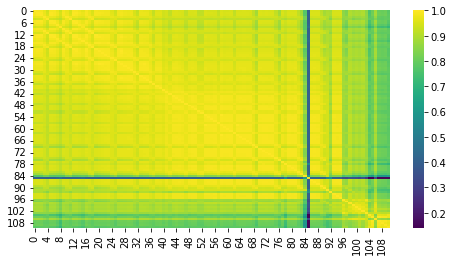

In [ ]:
used_data=[wed[i] for i in range(5,11)]+[sun[i] for i in range(5,11)]
learning_data=[]
for i in range(123):
    if i not in used_data:
        learning_data.append(i)


ij_elements=list(it.product(range(len(learning_data)), range(len(learning_data))))
corr_vector=[scipy.stats.spearmanr(single_vector(learning_data[i[0]]),single_vector(learning_data[i[1]]))[0] for i in ij_elements]

cr=np.array(corr_vector)
corr_matrix=cr.reshape((int(math.sqrt(len(corr_vector))),int(math.sqrt(len(corr_vector)))))
np.shape(corr_matrix)
heatmap(corr_matrix, cmap='viridis')

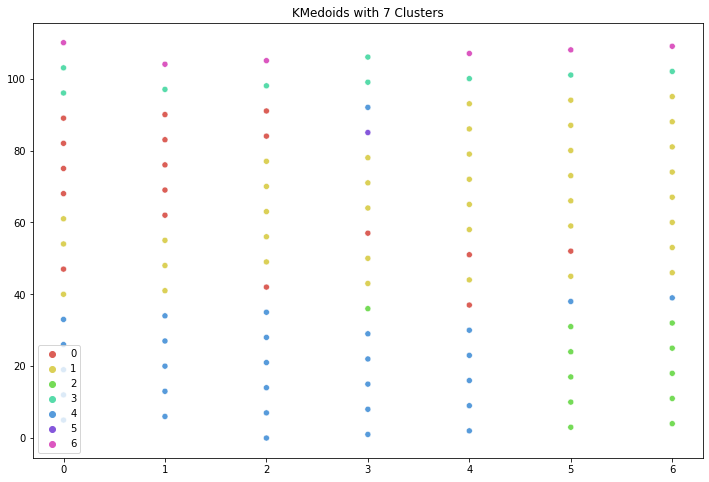

In [ ]:
kmedoids = KMedoids(n_clusters=7,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix)
lab=kmedoids.labels_
plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 7))
plt.title('KMedoids with 7 Clusters')
plt.show()

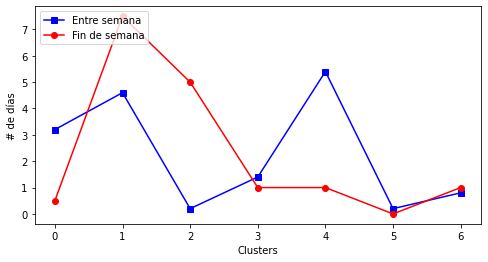

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]



y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]+[len(five)]+[len(six)]
x=[i for i in range(7)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]+[len(ffive)]+[len(fsix)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()

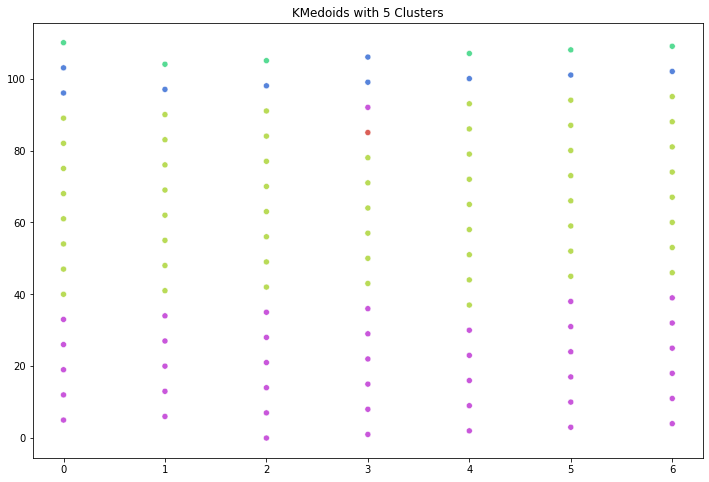

In [ ]:
kmedoids = KMedoids(n_clusters=5,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix)
lab=kmedoids.labels_

plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 5),legend=False)
plt.title('KMedoids with 5 Clusters')
plt.show()

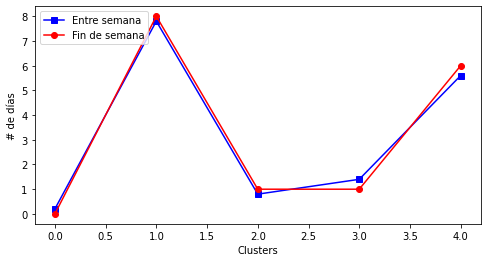

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]



y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]
x=[i for i in range(5)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()

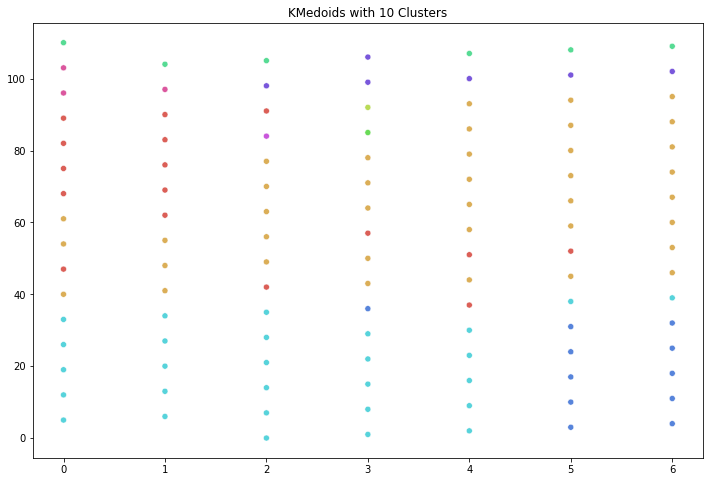

In [ ]:
kmedoids = KMedoids(n_clusters=10,  metric='precomputed', method='pam', init='heuristic', max_iter=100, random_state=None).fit(1-corr_matrix)
lab=kmedoids.labels_

plt.figure(figsize=(12, 8))
sn.scatterplot(x=[r[i].weekday() for i in range(len(learning_data))],y=[i for i in range(len(learning_data))], hue=lab, 
                palette=sn.color_palette('hls', 10),legend=False)
plt.title('KMedoids with 10 Clusters')
plt.show()

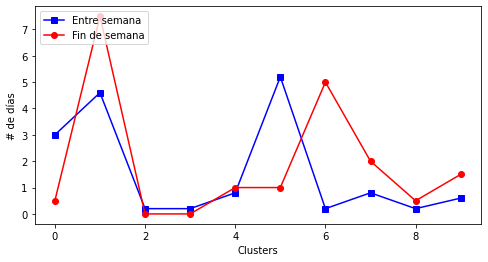

In [ ]:
zeros=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==0]
one=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==1]
two=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==2]
three=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==3]
four=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==4]
five=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==5]
six=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==6]
seven=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==7]
eight=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==8]
nine=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==9]

fzeros=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==0]
fone=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==1]
ftwo=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==2]
fthree=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==3]
ffour=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==4]
ffive=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==5]
fsix=[i for i in range(len(learning_data)) if (r[i].weekday()==5 or r[i].weekday()==6) and lab[i]==6]
fseven=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==7]
feight=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==8]
fnine=[i for i in range(len(learning_data)) if r[i].weekday()!=5 and r[i].weekday()!=6 and lab[i]==9]



y=[len(zeros)]+[len(one)]+[len(two)]+[len(three)]+[len(four)]+[len(five)]+[len(six)]+[len(seven)]+[len(eight)]+[len(nine)]

x=[i for i in range(10)]

fy=[len(fzeros)]+[len(fone)]+[len(ftwo)]+[len(fthree)]+[len(ffour)]+[len(ffive)]+[len(fsix)]+[len(fseven)]+[len(feight)]+[len(fnine)]

y[:]=[x/5 for x in y]
fy[:]=[x/2 for x in fy]


fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(x,y, c='b', marker="s", label='Entre semana')
ax1.plot(x,fy, c='r', marker="o", label='Fin de semana')
plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] = [8, 4]
plt.title("")
plt.xlabel("Clusters")
plt.ylabel("# de días")
plt.show()